# Use SQL to get data from database

### Show all cities in Japan
```sql
select *
from city_list
where country = 'Japan';
```

### Get Nagoya-Japan data
```sql
select *
from city_data
where country = 'Japan'
 and city='Nagoya';
```

## Get Global data
```sql
select *
from global_data ;
```


# Load CSV to dataframe and check its information (missing data, column name)

In [76]:
import pandas as pd
from os import path

from pandas import DataFrame

csv_folder = '/Users/lskd007/PycharmProjects/learn_data_analyst/csv'
# load global data
df_global = pd.read_csv(path.join(csv_folder, 'global_data.csv'))
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


# Load Nagoya data to dataframe, clean missing data

In [77]:
# load local data
df_local = pd.read_csv(path.join(csv_folder, 'nagoya_data.csv'))
df_local.dropna(inplace=True)
# check data
df_local.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 172
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      171 non-null    int64  
 1   city      171 non-null    object 
 2   country   171 non-null    object 
 3   avg_temp  171 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.7+ KB


# Check outlier --> It's OK

In [78]:
# check outlier
print(df_local.avg_temp.min(), df_local.avg_temp.max())
print(df_global.avg_temp.min(), df_global.avg_temp.max())

13.43 16.45
5.78 9.83


# Check min max average temperature

In [79]:
# check max min years
df_local.sort_values('avg_temp').iloc[[0,-1]]

,year,city,country,avg_temp
3,1844,Nagoya,Japan,13.43
157,1998,Nagoya,Japan,16.45


In [80]:
# check max min years
df_global.sort_values('avg_temp').iloc[[0,-1]]

,year,avg_temp
2,1752,5.78
265,2015,9.83


# Calculate 5 years moving average
ex : print(df_global['avg_temp'].head(5).mean())


In [81]:
# Moving average 5 years
df_global['moving_avg'] = df_global.avg_temp.rolling(window=5).mean()
df_global

,year,avg_temp,moving_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
...,...,...,...
261,2011,9.52,9.578
262,2012,9.51,9.534
263,2013,9.61,9.570
264,2014,9.57,9.582


In [82]:
df_local['moving_avg'] = df_local['avg_temp'].rolling(window=5).mean()
df_local

,year,city,country,avg_temp,moving_avg
0,1841,Nagoya,Japan,13.90,NaN
3,1844,Nagoya,Japan,13.43,NaN
4,1845,Nagoya,Japan,14.20,NaN
5,1846,Nagoya,Japan,14.54,NaN
6,1847,Nagoya,Japan,14.50,14.114
...,...,...,...,...,...
168,2009,Nagoya,Japan,15.67,15.598
169,2010,Nagoya,Japan,15.87,15.700
170,2011,Nagoya,Japan,15.43,15.696
171,2012,Nagoya,Japan,15.21,15.550


# Nagoya city 5 years moving average line chart

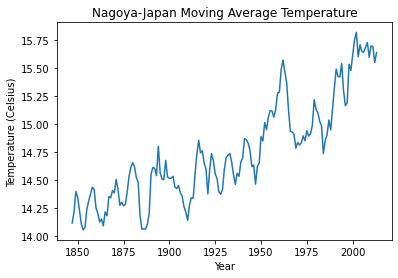

In [83]:
import matplotlib.pyplot as plt

plt.plot(df_local['year'], df_local['moving_avg'])
plt.title("Nagoya-Japan Moving Average Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

* From 1844 to 1998 temperature is on up-trend.
* The bottom is 1844, the top is 1998. after 1998 the temperature seems go down-trend or maybe side-way.

# Global 5 years moving average Line chart

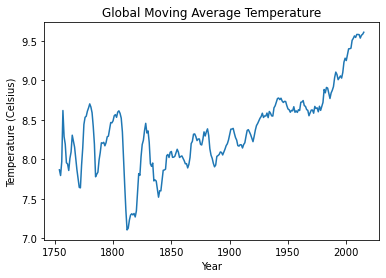

In [84]:
plt.plot(df_global['year'], df_global['moving_avg'])
plt.title("Global Moving Average Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

* Around 1750 to 1850 , the temperature is a little down-trend.
* From 1850 to current , the temperature is on up-trend, and there is no sign that this trend will stop.
* the bottom is 1752, the top is 2015.


# Show all data in the same line chart

In [85]:
# compare 2 lines chart
df_join = pd.merge(df_global, df_local, left_on='year', right_on='year')
df_join.dropna(inplace=True)
df_join

,year,avg_temp_x,moving_avg_x,city,country,avg_temp_y,moving_avg_y
4,1847,8.09,8.062,Nagoya,Japan,14.50,14.114
5,1848,7.98,8.024,Nagoya,Japan,14.38,14.210
6,1849,7.98,8.090,Nagoya,Japan,14.36,14.396
7,1850,7.90,8.100,Nagoya,Japan,13.95,14.346
8,1851,8.18,8.026,Nagoya,Japan,13.93,14.224
...,...,...,...,...,...,...,...
166,2009,9.51,9.580,Nagoya,Japan,15.67,15.598
167,2010,9.70,9.580,Nagoya,Japan,15.87,15.700
168,2011,9.52,9.578,Nagoya,Japan,15.43,15.696
169,2012,9.51,9.534,Nagoya,Japan,15.21,15.550


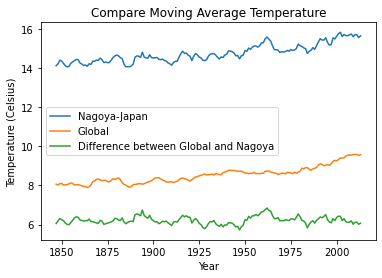

In [86]:
x = df_join.year
global_y = df_join.moving_avg_x
nagoya_y = df_join.moving_avg_y
diff_y = nagoya_y - global_y
plt.plot(x, nagoya_y, label="Nagoya-Japan")
plt.plot(x, global_y, label="Global")
plt.plot(x, diff_y, label="Difference between Global and Nagoya")
plt.title("Compare Moving Average Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.show()

# Scatter plot and regression line

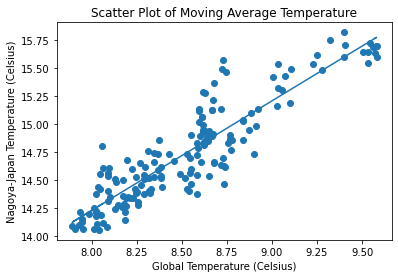

In [87]:
# Draw Scatter plot to see correlation of two
from numpy.polynomial.polynomial import polyfit
plt.scatter(global_y, nagoya_y)
plt.title("Scatter Plot of Moving Average Temperature")
plt.xlabel("Global Temperature (Celsius)")
plt.ylabel("Nagoya-Japan Temperature (Celsius)")
# line regression
b, m = polyfit(global_y, nagoya_y, 1)
plt.plot(global_y, m * global_y + b)
plt.show()

* Global and Nagoya temperature trend is similar. correlation is positive. It means that when Global temperature move up , the temperature in Nagoya will do the same.

# How to estimate Nagoya temperature from Global temperature

In [88]:
print(f'nagoya_temperature = {m} * global_temperature + {b}')

nagoya_temperature = 0.9807632352516298 * global_temperature + 6.380719042560417


# Correlation is strong positive (corr=0.9)

In [89]:
# calculate correlation
df_join['moving_avg_x'].corr(df_join['moving_avg_y'])

0.9034757602350102

# Conclusion
Almost the time the temperature of Global and Nagoya are increase year by year.
But from 1998 , temperature in Nagoya seems going down.
We can use below formular to estimate Nagoya temperature from Global temperature:
```
nagoya_temperature = 0.9807632352516298 * global_temperature + 6.380719042560417
```

## Different
* From 1998 to current:
  Nagoya : Down-trend or side-way
  Global : Up-trend

## Similar
* From 1844 To 1998:
  Nagoya : Up-trend
  Global : Up-trend